In [1]:
#import all necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.impute import SimpleImputer

In [2]:
#load the dataset to the notebook
college = pd.read_csv('go to college.csv')

In [3]:
#check the first 5 rows of the data
college.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [4]:
#Check a quick statistical review of the numerical columns in the dataset
college.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [5]:
#Check for important information about the dataset
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [6]:
#Check for missing values in the dataset
college.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [7]:
#convert categorical values into numerical ones
le = LabelEncoder()
for col in college.columns:
    if college[col].dtypes == 'object' or 'bool':
        college[col] = le.fit_transform(college[col])

In [8]:
college.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,1,1,1,16,376,313,200,0,1
1,0,0,1,1,1,17,147,256,405,0,1
2,0,1,0,4,1,10,340,293,438,0,1
3,1,1,1,4,0,9,349,270,81,1,1
4,0,0,0,4,1,17,224,242,395,0,0


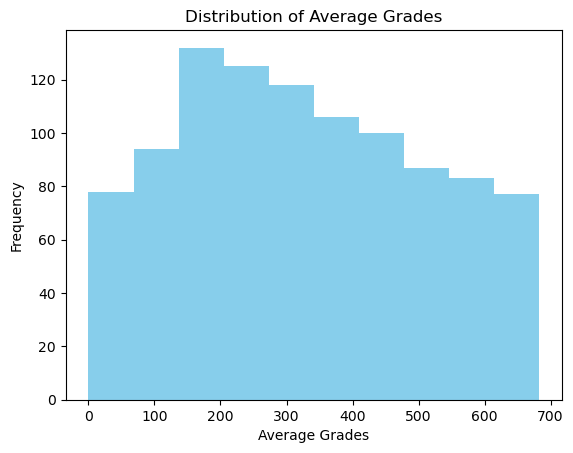

In [9]:
# Explore the distribution of 'average_grades' using a histogram
plt.hist(college['average_grades'], bins=10, color='skyblue')
plt.xlabel('Average Grades')
plt.ylabel('Frequency')
plt.title('Distribution of Average Grades')
plt.show()

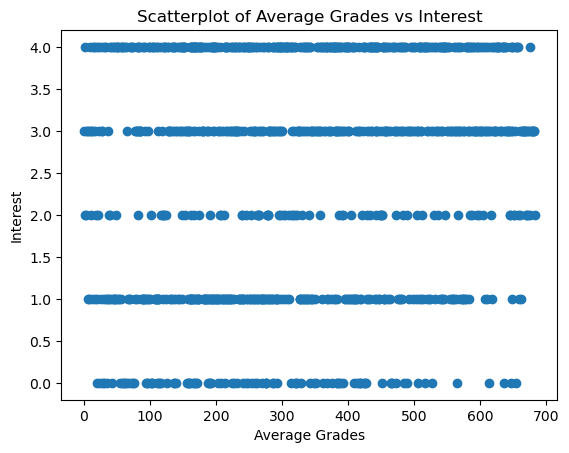

In [10]:
# Create a scatterplot between 'average_grades' and 'interest'
plt.scatter(college['average_grades'], college['interest'])
plt.xlabel('Average Grades')
plt.ylabel('Interest')
plt.title('Scatterplot of Average Grades vs Interest')
plt.show()


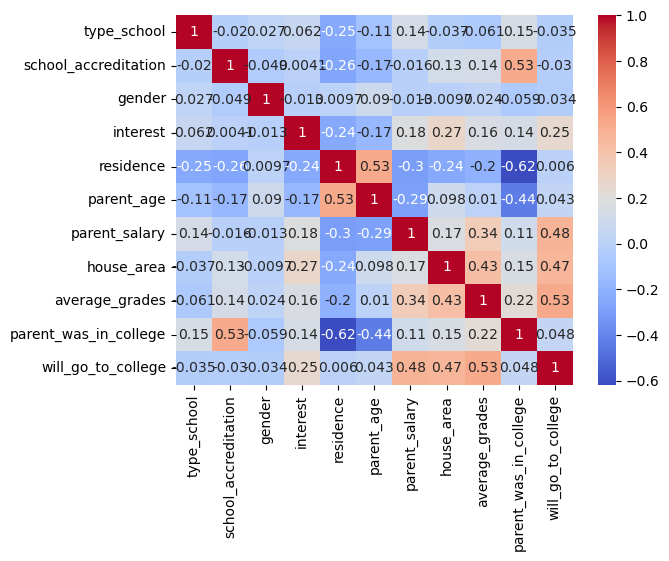

In [11]:
# Compute the correlation matrix
corr_matrix = college.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [12]:
#Split the dataset into X and y
X = college.drop(['will_go_to_college'], axis = 1)
y = college['will_go_to_college']

In [13]:
#view X
X

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,0,0,1,1,1,16,376,313,200,0
1,0,0,1,1,1,17,147,256,405,0
2,0,1,0,4,1,10,340,293,438,0
3,1,1,1,4,0,9,349,270,81,1
4,0,0,0,4,1,17,224,242,395,0
...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,4,0,9,407,145,343,1
996,0,1,0,1,0,11,412,322,559,1
997,1,0,1,1,1,9,253,243,12,0
998,0,1,1,3,0,13,278,457,423,1


In [14]:
#view y
y

0      1
1      1
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    1
999    0
Name: will_go_to_college, Length: 1000, dtype: int64

In [15]:
#Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size= 0.2, random_state= 0)

In [16]:
#Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[-0.81862454,  0.95836592,  0.95596841, ...,  0.00525201,
         1.15393792,  0.94880848],
       [ 1.22156123, -1.04344279, -1.04605967, ..., -1.09044432,
         0.92160777, -1.05395348],
       [-0.81862454,  0.95836592, -1.04605967, ..., -1.11632692,
        -0.5101943 ,  0.94880848],
       ...,
       [ 1.22156123, -1.04344279, -1.04605967, ...,  0.04838966,
        -0.87219709, -1.05395348],
       [-0.81862454,  0.95836592,  0.95596841, ..., -0.16729859,
        -0.31568534,  0.94880848],
       [-0.81862454,  0.95836592,  0.95596841, ...,  1.3166366 ,
         0.35428997,  0.94880848]])

In [18]:
X_test

array([[-0.81862454,  0.95836592,  0.95596841, ..., -1.60809614,
        -0.53720944,  0.94880848],
       [-0.81862454, -1.04344279,  0.95596841, ...,  0.4883937 ,
        -0.85058498, -1.05395348],
       [ 1.22156123, -1.04344279, -1.04605967, ..., -0.67632288,
        -0.91001828, -1.05395348],
       ...,
       [-0.81862454, -1.04344279, -1.04605967, ..., -0.64181276,
        -0.16980362, -1.05395348],
       [-0.81862454, -1.04344279, -1.04605967, ...,  0.86800503,
        -0.47777614, -1.05395348],
       [-0.81862454,  0.95836592, -1.04605967, ...,  1.00604551,
         1.68343453,  0.94880848]])

In [19]:
#view the distribution of class labels in the training set
y_train.value_counts()

0    402
1    398
Name: will_go_to_college, dtype: int64

In [20]:
#Create the logistic regression model
classifier_LR = LogisticRegression(random_state=0)

In [21]:
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
y_pred_LR = classifier_LR.predict(X_test)
y_pred_LR

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [23]:
#check for the accuracy of the model
acc_LR = metrics.accuracy_score(y_test, y_pred_LR)
acc_LR

0.855

In [24]:
#check for the sensitivity of the model
recall_LR = metrics.recall_score(y_test, y_pred_LR)
recall_LR

0.8529411764705882

In [25]:
#check for the precision of the model
precision_LR = metrics.precision_score(y_test, y_pred_LR)
precision_LR

0.8613861386138614

In [26]:
#Check for the F1 score of the model
f1_score_LR =metrics.f1_score(y_test, y_pred_LR)
f1_score_LR

0.8571428571428572

In [27]:
#check for the ROC_AUC score
roc_auc_LR = metrics.roc_auc_score(y_test, y_pred_LR)
roc_auc_LR

0.8550420168067228

In [28]:
#view the confusion matrix
cm_LR = metrics.confusion_matrix(y_test, y_pred_LR)
cm_LR

array([[84, 14],
       [15, 87]], dtype=int64)

In [29]:
#view the classification report
result_LR = metrics.classification_report(y_test, y_pred_LR)
print('Classification Report:\n')
print(result_LR)

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        98
           1       0.86      0.85      0.86       102

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



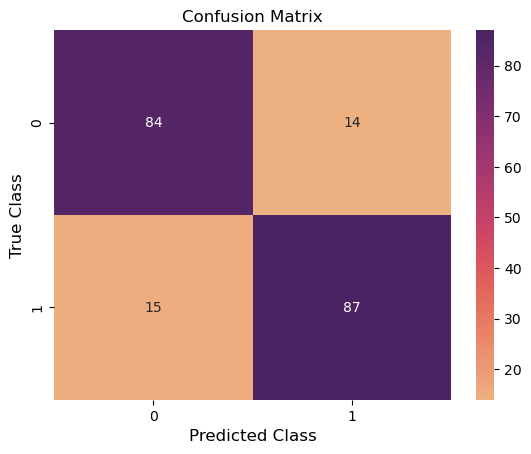

In [30]:
#visualize the confusion matrix
ax = sns.heatmap(cm_LR, cmap = 'flare', annot= True, fmt = 'd')
plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 12)
plt.show()

CHECK FOR OVERFITTING

In [31]:
#Make predictions based on the training set
y_train_pred_LR = classifier_LR.predict(X_train)

#Make predictions based on the test set
y_test_pred_LR = classifier_LR.predict(X_test)

#Calculate the accuracy of the training set
acc_train_LR = metrics.accuracy_score(y_train, y_train_pred_LR)

#Calculate the accuracy of the test set
acc_test_LR = metrics.accuracy_score(y_test, y_test_pred_LR)

print('Training Accuracy:', acc_train_LR)
print('Test Accuracy:', acc_test_LR)

Training Accuracy: 0.85625
Test Accuracy: 0.855


TO APPLY THE KNN ALGORITHM, THE OPTIMAL NUMBER OF K(NEAREST NEIGHBORS) HAS TO BE FIRST DETERMINED

APPLY GRIDSEARCH CROSS-VALIDATION METHOD TO DETERMINE K

In [32]:
#Initialize the gridsearch
k_range = list(range(1, 31))


param_grid = dict(n_neighbors = k_range)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')

grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [33]:
#view the results of the gridsearch
results = grid.cv_results_

print(grid.best_score_)
print(grid.best_params_)

0.825
{'n_neighbors': 21}


RUN THE K-NEAREST NEIGHBOR CLASSIFIER

In [34]:
#Create the K-nearest neighbor model
classifier_KNN = KNeighborsClassifier(n_neighbors= 21)

In [35]:
#Train the model using the training set
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [36]:
#use the trained model to predict outcome of the test set 
y_pred_KNN = classifier_KNN.predict(X_test)

In [37]:
#view the predicted outcome
y_pred_KNN

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [38]:
#Check for the accuracy of the model
acc_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
acc_KNN

0.83

In [39]:
#Check for the precision of the model
prec_KNN = metrics.precision_score(y_test, y_pred_KNN)
prec_KNN

0.8333333333333334

In [40]:
#Check for the sensitivity of the model
recall_KNN = metrics.recall_score(y_test, y_pred_KNN)
recall_KNN

0.8333333333333334

In [41]:
#Check for the F1 score of the model
f1_score_KNN =metrics.f1_score(y_test, y_pred_KNN)
f1_score_KNN

0.8333333333333334

In [42]:
#Check for the ROC_AUC score of the model
roc_auc_KNN = metrics.roc_auc_score(y_test, y_pred_KNN)
roc_auc_KNN

0.8299319727891157

In [43]:
#view the confusion matrix of the model
cm_KNN = metrics.confusion_matrix(y_test, y_pred_KNN)
cm_KNN

array([[81, 17],
       [17, 85]], dtype=int64)

In [44]:
#view the classification report
result_KNN = metrics.classification_report(y_test, y_pred_KNN)
print('Classification Report:\n')
print(result_KNN)

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        98
           1       0.83      0.83      0.83       102

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



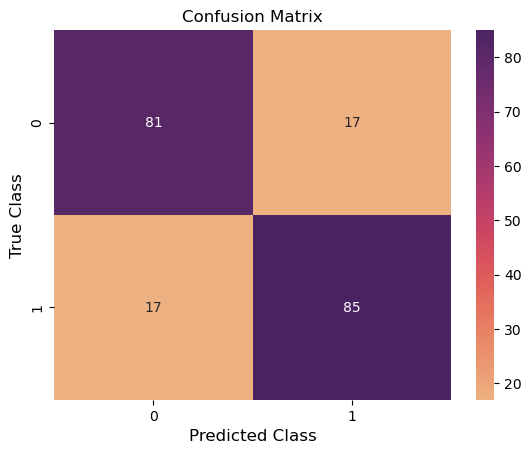

In [45]:
#visualize the confusion matrix of the model
ax = sns.heatmap(cm_KNN, cmap = 'flare', annot= True, fmt = 'd')
plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 12)
plt.show()

CHECK FOR OVERFITTING

In [46]:
#Make predictions based on the training set
y_train_pred_KNN = classifier_KNN.predict(X_train)

#Make predictions based on the test set
y_test_pred_KNN = classifier_KNN.predict(X_test)

#Calculate the accuracy of the training set
acc_train_KNN = metrics.accuracy_score(y_train, y_train_pred_KNN)

#Calculate the accuracy of the test set
acc_test_KNN = metrics.accuracy_score(y_test, y_test_pred_KNN)

print('Training Accuracy:', acc_train_KNN)
print('Test Accuracy:', acc_test_KNN)

Training Accuracy: 0.88375
Test Accuracy: 0.83
